# GoogleStock Prediction Using RNN

In [8]:
# conda install tensorflow

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/rishurai/anaconda3

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.2.0        |            eigen           3 KB
    abseil-cpp-20211102.0      |       hc377ac9_0         933 KB
    absl-py-1.3.0              |  py310hca03da5_0         169 KB
    aiohttp-3.8.3              |  py310h80987f9_0         440 KB
    aiosignal-1.2.0            |     pyhd3eb1b0_0          12 KB
    astunparse-1.6.3           |             py_0          17 KB
    async-timeout-4.0.2        |  py310hca03da5_0          13 KB
    blinker-1.4                |  py310hca03da5_0          22 KB
 

 ... (more hidden) ...


oauthlib-3.2.2       | 212 KB    | ##7                                   |   8% 

flatbuffers-2.0.0    | 890 KB    | 6                                     |   2% 
aiosignal-1.2.0      | 12 KB     | ##################################### | 100% 
aiosignal-1.2.0      | 12 KB     | ##################################### | 100% 




google-auth-2.6.0    | 83 KB     | #######1                              |  19% 

flatbuffers-2.0.0    | 890 KB    | #############3                        |  36% 


oauthlib-3.2.2       | 212 KB    | ##################################### | 100% 


oauthlib-3.2.2       | 212 KB    | ##################################### | 100% 




google-auth-2.6.0    | 83 KB     | ##################################### | 100% 

flatbuffers-2.0.0    | 890 KB    | ##################################### | 100% 

flatbuffers-2.0.0    | 890 KB    | ##################################### | 100% 







astunparse-1.6.3     | 17 KB     | ##########################

tensorflow-base-2.10 | 90.6 MB   | #############2                        |  36% 











tensorflow-base-2.10 | 90.6 MB   | #############5                        |  37% 











tensorflow-base-2.10 | 90.6 MB   | #############8                        |  37% 











tensorflow-base-2.10 | 90.6 MB   | ##############                        |  38% 











tensorflow-base-2.10 | 90.6 MB   | ##############3                       |  39% 











tensorflow-base-2.10 | 90.6 MB   | ##############6                       |  40% 











tensorflow-base-2.10 | 90.6 MB   | ##############8                       |  40% 











tensorflow-base-2.10 | 90.6 MB   | ###############1                      |  41% 











tensorflow-base-2.10 | 90.6 MB   | ###############4                      |  42% 











tensorflow-base-2.10 | 90.6 MB   | ###############6                      |  42% 











tensorflow-base-2.10 | 90.6 MB   | ###############9                      |  43% 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

training_set=pd.read_csv('dataset/GoogleStockPrice_Train.csv')
training_set=training_set.iloc[:,1:2].values

In [2]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
training_set=sc.fit_transform(training_set)

X_train= training_set[0:1257]
y_train= training_set[1:1258]

X_train=np.reshape(X_train, (1257 , 1 , 1))

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [12]:
regressor = Sequential()

regressor.add(LSTM(units=4, activation= 'sigmoid', input_shape= (None,1)))

regressor.add(Dense( units=1 ))

regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
40/40 [==============================] - 0s 1ms/step - loss: 0.1329
Epoch 2/200
40/40 [==============================] - 0s 700us/step - loss: 0.0988
Epoch 3/200
40/40 [==============================] - 0s 616us/step - loss: 0.0840
Epoch 4/200
40/40 [==============================] - 0s 462us/step - loss: 0.0790
Epoch 5/200
40/40 [==============================] - 0s 495us/step - loss: 0.0766
Epoch 6/200
40/40 [==============================] - 0s 492us/step - loss: 0.0749
Epoch 7/200
40/40 [==============================] - 0s 479us/step - loss: 0.0732
Epoch 8/200
40/40 [==============================] - 0s 497us/step - loss: 0.0714
Epoch 9/200
40/40 [==============================] - 0s 533us/step - loss: 0.0696
Epoch 10/200
40/40 [==============================] - 0s 505us/step - loss: 0.0677
Epoch 11/200
40/40 [==============================] - 0s 511us/step - loss: 0.0658
Epoch 12/200
40/40 [==============================] - 0s 489us/step - loss: 0.0639
Epoch 13/200
40

40/40 [==============================] - 0s 471us/step - loss: 2.5727e-04
Epoch 191/200
40/40 [==============================] - 0s 621us/step - loss: 2.6022e-04
Epoch 192/200
40/40 [==============================] - 0s 485us/step - loss: 2.5893e-04
Epoch 193/200
40/40 [==============================] - 0s 463us/step - loss: 2.5750e-04
Epoch 194/200
40/40 [==============================] - 0s 446us/step - loss: 2.5584e-04
Epoch 195/200
40/40 [==============================] - 0s 448us/step - loss: 2.5642e-04
Epoch 196/200
40/40 [==============================] - 0s 457us/step - loss: 2.5511e-04
Epoch 197/200
40/40 [==============================] - 0s 464us/step - loss: 2.5582e-04
Epoch 198/200
40/40 [==============================] - 0s 458us/step - loss: 2.5566e-04
Epoch 199/200
40/40 [==============================] - 0s 469us/step - loss: 2.5954e-04
Epoch 200/200
40/40 [==============================] - 0s 467us/step - loss: 2.5986e-04


In [14]:
test_set = pd.read_csv('dataset/GoogleStockPrice_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values

inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20 , 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 17ms/step


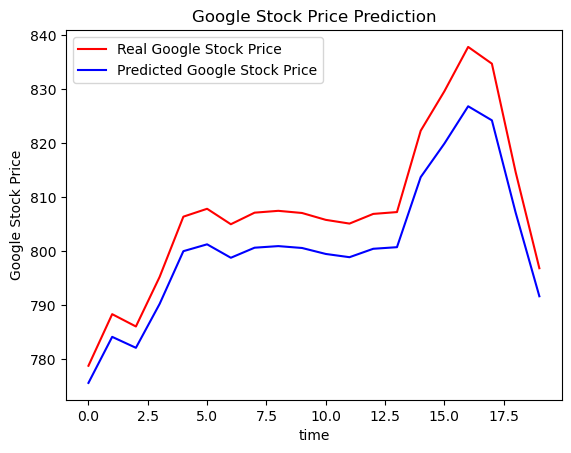

In [15]:
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()